# <center> <div style="width: 370px;"> ![numpy title](pictures/numpy_tytle.jpg)

<h1 align="center">Array shapes and axis</h1>

Understanding the theory behind NumPy's multi-dimensional arrays is key to using them effectively. While one-dimensional vectors are straightforward, visualizing arrays in higher dimensions can be challenging. 
As you move from two-dimensional matrices to three or more dimensions, keeping track of the array structure requires some mental gymnastics. It's easy to get lost in the abstraction of hyperspace. 
Mastering NumPy is like learning a new language. It opens up expressive possibilities you didn't have before. The effort to wrap your head around arrays with three, four, or more dimensions will expand your programming skills in the long run.

## Mastering Shape

Understanding the concept of shape is fundamental when working with multidimensional arrays. As you delve into the world of data manipulation, it becomes more practical to rely on mental heuristics and trust NumPy to report the accurate shape of your data, rather than constantly visualizing it.

All arrays possess a property known as `.shape`, which yields a tuple indicating the size along each dimension. While it may be less crucial to memorize the specific dimensions, it is of paramount importance to ensure that the arrays provided to functions align with the expected shape. A common practice is to print both the data and its shape iteratively until you gain confidence that everything is behaving as anticipated.

To illustrate this process, consider the following example. You will create an array with a complex shape, validate its shape, and subsequently restructure it to match the intended configuration:

In [1]:
import numpy as np

In [2]:
temperatures = (np.random.randint(100, size=24))

In [3]:
temperatures

array([30, 42, 21, 36, 51, 17, 43, 35, 70, 24, 35, 77, 42, 21, 83, 48, 18,
       74, 30, 61,  0, 78, 13, 71])

In [4]:
temperatures = temperatures.reshape(2, 3, 4)

In [5]:
temperatures.shape

(2, 3, 4)

In [6]:
temperatures

array([[[30, 42, 21, 36],
        [51, 17, 43, 35],
        [70, 24, 35, 77]],

       [[42, 21, 83, 48],
        [18, 74, 30, 61],
        [ 0, 78, 13, 71]]])

In [7]:
temperatures.reshape(2, 4, 3)

array([[[30, 42, 21],
        [36, 51, 17],
        [43, 35, 70],
        [24, 35, 77]],

       [[42, 21, 83],
        [48, 18, 74],
        [30, 61,  0],
        [78, 13, 71]]])

In [8]:
temperatures.shape

(2, 3, 4)

In [9]:
np.swapaxes(temperatures, 1, 2)

array([[[30, 51, 70],
        [42, 17, 24],
        [21, 43, 35],
        [36, 35, 77]],

       [[42, 18,  0],
        [21, 74, 78],
        [83, 30, 13],
        [48, 61, 71]]])

In [10]:
temperatures

array([[[30, 42, 21, 36],
        [51, 17, 43, 35],
        [70, 24, 35, 77]],

       [[42, 21, 83, 48],
        [18, 74, 30, 61],
        [ 0, 78, 13, 71]]])

Here, you utilize a `numpy.ndarray` and employ the `.reshape()` method to construct a 2 × 3 × 4 and 2 × 3 × 4 block of data. In the third input, when you inspect the shape of your array, it precisely matches your specification. However, it becomes apparent that visualizing arrays in three or more dimensions can quickly become challenging.

By applying `.swapaxes()`, you enhance the clarity of your array, making it easier to discern the various dimensions. This concept will be further explored in the upcoming section on axes.

It's worth noting that these shape-related checks come at minimal computational cost. You can always remove these cells or eliminate the code once your operations are running smoothly.

## Understanding Axis

In NumPy, axes are the dimensions of an array. They are zero-indexed, so the first axis is axis 0, the second axis is axis 1, and so on.

The axis argument to a function tells the function which axis to operate on. For example, the `.max()` function returns the maximum value in an array. By default, `.max()` operates on the entire array, but you can also specify a specific axis.

The following example shows how `.max()` behaves with and without an axis argument:

In [11]:
import numpy as np

grades = np.array([
    [85, 90, 78, 88, 92],
    [76, 82, 89, 91, 78],
    [92, 88, 85, 89, 94],
    [80, 78, 92, 87, 85],
])

In [12]:
grades

array([[85, 90, 78, 88, 92],
       [76, 82, 89, 91, 78],
       [92, 88, 85, 89, 94],
       [80, 78, 92, 87, 85]])

In [13]:
grades.mean(axis=0)

array([83.25, 84.5 , 86.  , 88.75, 87.25])

In [14]:
grades.max(axis=1)

array([92, 91, 94, 92])

In [15]:
grades.flatten()

array([85, 90, 78, 88, 92, 76, 82, 89, 91, 78, 92, 88, 85, 89, 94, 80, 78,
       92, 87, 85])

In [16]:
grades.shape

(4, 5)

In [17]:
grades.max()

94

In [18]:
grades.max(axis=0)

array([92, 90, 92, 91, 94])

In [19]:
grades.max(axis=1)

array([92, 91, 94, 92])

By default, `.max()` returns the largest value in the entire array, no matter how many dimensions there are. However, once you specify an axis, it performs that calculation for each set of values along that particular axis. For example, with an argument of `axis=0`, `.max()`selects the maximum value in each of the four vertical sets of values in table and returns an array that has been ***flattened***, or aggregated into a one-dimensional array.

In fact, many of NumPy’s functions behave this way: If no axis is specified, then they perform an operation on the entire dataset. Otherwise, they perform the operation in an ***axis-wise*** fashion.

# <center> <div style="width: 700px;">  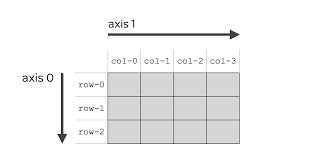

You may wondering how to know which dimension is which. By definition, the axis number of the dimension is the index of that dimension within the array's shape. It is also the position used to access that dimension during indexing.

For example, if a 2D array a has shape `(5,6)`, then you can access `a[0,0]` up to `a[4,5]`. Axis 0 is thus the first dimension (the "rows"), and axis `1` is the second dimension (the "columns"). In higher dimensions, where "row" and "column" stop really making sense, try to think of the axis in terms of the shapes and indices involved.

If you do `.sum(axis=n)`, for example, then dimension `n` is collapsed and deleted, with each value in the new matrix equal to the sum of the corresponding collapsed values. For example, if b has shape `(5,6,7,8)`, and you do `c = b.sum(axis=2)`, then axis 2 (dimension with size 7) is collapsed, and the result has shape (5,6,8). Furthermore, `c[x,y,z]` is equal to the sum of all elements `b[x,y,:,z]`.

In [20]:
import numpy as np

In [21]:
x = np.random.randint(120, size=(2, 4, 2, 5))

In [22]:
x

array([[[[ 27,  51,  71,  78,  96],
         [ 55, 111,  86,  35,   4]],

        [[ 14,  41,  56, 112,  24],
         [ 57, 119,   9,  52,  38]],

        [[ 59,  92,   5,  40,  99],
         [ 40, 117,   7,  23, 107]],

        [[ 68, 117,  30, 109,  78],
         [ 67,  12,  19,  15,   6]]],


       [[[ 56,  57,  10, 118,  79],
         [ 26, 106,  98,  24,  96]],

        [[ 85,   0,  78,  39,  61],
         [ 60,  55,  14, 112,  84]],

        [[116,  65, 105,  58,  41],
         [107,  93,  95, 118,  66]],

        [[ 86, 104,  69,  27,  98],
         [ 35, 100,  61,  35,   1]]]])

In [23]:
y = x.sum(axis=1)

In [24]:
y

array([[[168, 301, 162, 339, 297],
        [219, 359, 121, 125, 155]],

       [[343, 226, 262, 242, 279],
        [228, 354, 268, 289, 247]]])

## Reshaping Arrays

Reshaping arrays is a fundamental operation when working with NumPy, especially when dealing with multidimensional arrays. You might create a NumPy array in one dimension and then reshape it into a multidimensional structure, or you may need to flatten a multidimensional array into a one-dimensional form. The key principle to remember is that you can change the shape of your arrays, but the total number of elements should remain the same. In other words, you can't reshape a 3x3 array into a 10x1 array, as the total number of elements in the array must remain consistent before and after reshaping. If you need to change the number of elements, that's a different operation called resizing. Now, let's explore some common array shape manipulation techniques:

In [25]:
x = np.random.randint(100, size=60)

In [26]:
x

array([54,  2, 21, 19, 52, 49, 61, 23, 51, 22, 59, 26, 50,  2, 83, 68, 91,
        6, 30, 62, 75, 26, 60, 39, 79, 71, 95, 44,  2,  7, 67, 37, 70, 12,
       38, 61, 38, 10, 87, 34, 22, 30, 50, 58, 91, 75, 69, 42, 55, 19, 28,
       18, 73, 23, 50, 58,  2,  9, 73, 82])

In [27]:
x.strides

(8,)

In [28]:
x.shape = 3, 4, -1

In [29]:
x

array([[[54,  2, 21, 19, 52],
        [49, 61, 23, 51, 22],
        [59, 26, 50,  2, 83],
        [68, 91,  6, 30, 62]],

       [[75, 26, 60, 39, 79],
        [71, 95, 44,  2,  7],
        [67, 37, 70, 12, 38],
        [61, 38, 10, 87, 34]],

       [[22, 30, 50, 58, 91],
        [75, 69, 42, 55, 19],
        [28, 18, 73, 23, 50],
        [58,  2,  9, 73, 82]]])

In [30]:
x.strides

(160, 40, 8)

The basic reshaping technique changes the `numpy.shape` attribute. In the preceding example, we have an array whose shape is `(60, 1)`, and after altering the shape attribute, we obtain an array of the same size but the shape has been changed to `3x4x5`. Note that `-1` in a shape means the remaining shape size of the transferred array.

The following example is to reshape a `100x100x100` array back to just one dimension; here, we apply two functions, `numpy.flatten()` and `numpy.ravel()`, to collapse the array, and at the same time, we also compare the execution time. We notice that the speed difference between `numpy.flatten()` and `numpy.ravel()` is huge, but both of them are much faster than three layers of Python looping. The difference in performance between the two functions is that `np.flatten()` creates a copy from the original array, while `np.ravel()` just changes the view (if you don't remember the difference between copies and views, go back a bit to previous sections on how numpy manages memory section).

In [31]:
x = np.arange(1000000)

In [32]:
x.shape = 100, 100, 100

In [33]:
%timeit x.flatten() 

513 µs ± 37.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [34]:
%timeit x.ravel()

96.2 ns ± 1.95 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


This example simply shows you that NumPy offers many functions and some of them can produce same results; pick up the function that satisfies your purpose and, at the same time, provides you with optimized performance.

> **Note:** It is not always possible to change the shape of an array without copying the data. If you want an error to be raised when the data is copied, you should assign the new shape to the shape attribute of the array.

## Broadcasting

 NumPy offers a unique feature called broadcasting, which allows you to perform operations on arrays with different shapes, greatly enhancing flexibility and convenience in data manipulation.

Broadcasting is the process by which NumPy treats arrays of varying shapes during arithmetic operations. Within certain constraints, a smaller array is "broadcast" across a larger one, effectively altering its shape to become compatible with the larger array. This technique allows you to perform operations without explicitly matching array shapes. Broadcasting is particularly powerful as it enables you to vectorize array operations, reducing the need for explicit Python loops.

### Key takeaways:


- Broadcasting follows specific rules and constraints, ensuring that operations between differently shaped arrays remain meaningful.

- While broad.casting enhances code flexibility, improper usage can lead to inefficient memory utilization and slower computations. It's crucial to grasp these rules to make optimal use of this feature.

- In the simplest case, NumPy operations require both arrays to have exactly the same shape, as demonstrated in the following example.

**Example:**

In [35]:
import numpy as np

In [36]:
array_1 = np.array([1, 2, 3])
array_2 = np.array([4, 5, 6])

In [37]:
array_1 + array_2

array([5, 7, 9])

NumPy's broadcasting rule revolutionizes the way arrays can be combined, relaxing the traditional constraint of having identical shapes. This flexibility becomes evident when arrays and scalar values interact in operations.

Consider the following example:

In [38]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
result = a * b

In [39]:
result

array([2., 4., 6.])

In this case, we multiply array `a` by a scalar value `b`. The result is `[2.0, 4.0, 6.0]`, which is equivalent to the outcome when `b` is also an array. 

To understand broadcasting, visualize the scalar `b` as being stretched during the arithmetic operation to match the shape of array `a`. However, it's important to note that this stretching is a conceptual idea; NumPy optimizes operations for memory and computational efficiency. It doesn't create actual copies of the scalar but uses the original value intelligently.

This broadcasting capability in NumPy allows for more flexible and memory-efficient operations, enabling you to work with arrays of varying shapes seamlessly.

# <center> <div style="width: 370px;"> 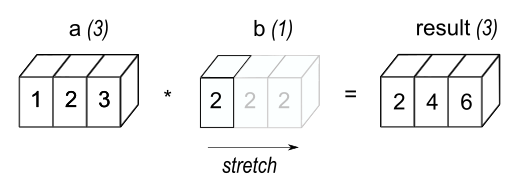
<center> Figure 1

## General Broadcasting Rules

NumPy's broadcasting mechanism empowers you to work with arrays of varying shapes, making it a powerful tool for array operations. To fully grasp how broadcasting works, let's explore the general rules governing this process.

1. **Shape Comparison**: When you perform operations on two arrays, NumPy compares their shapes element-wise. It begins with the trailing (rightmost) dimension and progresses to the left. Two dimensions are deemed compatible under the following conditions:

   - They are equal.
   - One of them is 1.

   If these conditions are not met, NumPy raises a `ValueError`, signaling that the arrays possess incompatible shapes.

2. **Differing Dimension Counts**: Input arrays do not need to have the same number of dimensions. The resulting array will have the same number of dimensions as the input array with the highest dimension count. In this resulting array, the size of each dimension corresponds to the largest size among the input arrays in that dimension. It's worth noting that absent dimensions are implicitly assigned a size of one.

   For instance, consider a scenario where you have a 256x256x3 array representing RGB values in an image, and you wish to apply different scaling factors to each color channel. You can achieve this by multiplying the image by a one-dimensional array with 3 values. Aligning the dimensions of these arrays using broadcast rules demonstrates compatibility:
   
```
Image (3D array):  256 x 256 x 3
Scale (1D array):              3
Result (3D array): 256 x 256 x 3
```

3. **Stretching Dimensions**: When one of the dimensions being compared is one, it effectively "borrows" the size from the other. In simpler terms, dimensions with a size of 1 are stretched or "copied" to match the size of the corresponding dimension in the other array.

   For instance, consider arrays A and B, where both contain dimensions of length one. During the broadcast operation, these dimensions are expanded to a larger size, leading to the following result:

```
A (4D array):       8 x 1 x 6 x 1
B (3D array):           7 x 1 x 5
Result (4D array):  8 x 7 x 6 x 5
```

Understanding these general broadcasting rules is fundamental to harnessing the full potential of NumPy, enabling you to perform efficient and versatile array operations with ease.

## Broadcastable arrays

A set of arrays is called “broadcastable” to the same shape if the above rules produce a valid result.

For example, if `a.shape` is (5,1), `b.shape` is (1,6), `c.shape` is (6,) and `d.shape` is () so that d is a scalar, then a, b, c, and d are all broadcastable to dimension (5,6); and

- a acts like a (5,6) array where `a[:,0]` is broadcast to the other columns,
- b acts like a (5,6) array where `b[0,:]` is broadcast to the other rows,
- c acts like a (1,6) array and therefore like a (5,6) array where `c[:]` is broadcast to every row, and finally,
- d acts like a (5,6) array where the single value is repeated.

Here are some more examples:

```
A      (2d array):  5 x 4
B      (1d array):      1
Result (2d array):  5 x 4

A      (2d array):  5 x 4
B      (1d array):      4
Result (2d array):  5 x 4

A      (3d array):  15 x 3 x 5
B      (3d array):  15 x 1 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 1
Result (3d array):  15 x 3 x 5
```

Here are examples of shapes that do not broadcast:


```
A      (1d array):  3
B      (1d array):  4 # trailing dimensions do not match

A      (2d array):      2 x 1
B      (3d array):  8 x 4 x 3 # second from last dimensions mismatched

```

An example of broadcasting when a 1-d array is added to a 2-d array:

In [40]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
a + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

In [41]:
b = np.array([1.0, 2.0, 3.0, 4.0])
a + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

As shown in Figure 2, `b` is added to each row of `a`. In Figure 3, an exception is raised because of the incompatible shapes.

# <center> <div style="width: 370px;"> 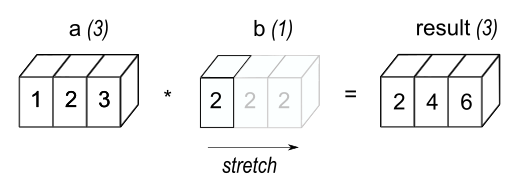
<center> Figure 1

# <center> <div style="width: 370px;"> 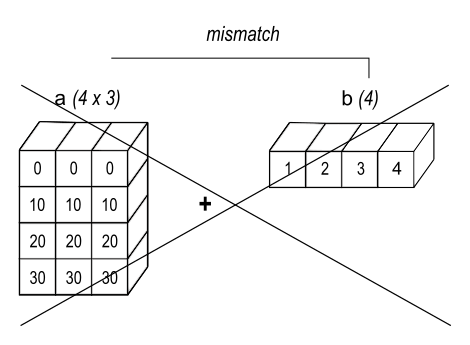
<center> Figure 3

Broadcasting provides a convenient way of taking the outer product (or any other outer operation) of two arrays. The following example shows an outer addition operation of two 1-d arrays:

In [ ]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, np.newaxis] + b

# <center> <div style="width: 700px;"> 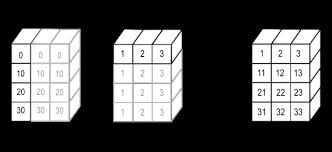
<center> Figure 4

Here the `newaxis` index operator inserts a new axis into `a`, making it a two-dimensional `4x1` array. Combining the` 4x1` array with `b`, which has shape `(3,)`, yields a `4x3` array.

In [ ]:
x = np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20]])

In [ ]:
y = np.arange(1, 5) 

In [ ]:
x + y

## Summarize

The rules of broadcasting are:

- Arrays must have the same number of dimensions or one array can have one less dimension. Missing dimensions are treated as size 1.
- Dimensions are matched from the end moving left. Equal sized dimensions match. One-sized dimensions are stretched to match the other shape.
- If dimensions do not match, a ValueError is raised indicating incompatible shapes.

The result array ends up with the maximum size for each dimension from the input arrays based on these rules.

Broadcasting avoids slow Python loops and unnecessary copying of data. It leads to efficient vectorized array operations in NumPy. However, large intermediate arrays can also be created, which can slow down computations.

In summary, broadcasting is NumPy's method of flexibly performing fast element-wise operations on arrays of different shapes by expanding one or more input arrays to match the shape of the largest input without unnecessary copying. It enables vectorized array computations but care must be taken to avoid large intermediate results.